In [1]:
import PMM 

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal

def real_u(x):
    return  (1/ (2* np.pi**2))*((np.sin(np.pi * x))**2)

def gauss_kernel(x1, x2, L=0.25):
    return np.exp(- (x1-x2)**2 / (2* L**2))

def gauss_kernel_derix(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (-(x1 - x2) / L**2)

def gauss_kernel_deriy(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * ((x1 - x2) / L**2)

def gauss_kernel_derixy(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**4) * (-(x1-x2)**2  + L**2)

def gauss_kernel_derixx(x1, x2, L=0.25): #This is A operator 
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**4) * ((x1-x2)**2  - L**2)

def gauss_kernel_deriyy(x1, x2, L=0.25): #This is A_hat operator 
    return gauss_kernel_derixx(x1, x2, L) 

#AA_hat operator
def gauss_kernel_derixxyy(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**8) *(3* (L**4) - 6* (L**2)*((x1-x2)**2) + (x1-x2)**4)

g1 =  lambda x: np.cos(2*np.pi*x)
b1 = lambda x: 0

d1, d2 = 0, 1
D = [0, 1]

<Figure size 648x432 with 0 Axes>

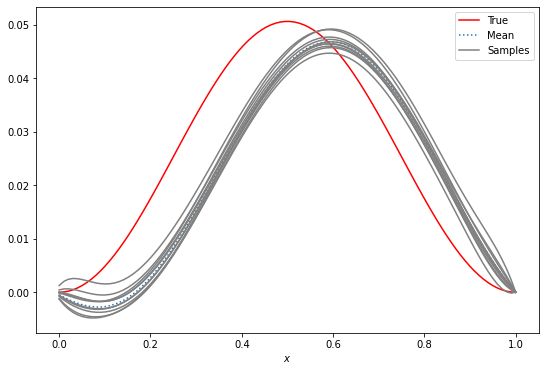

In [2]:
poisson = PMM.PMM(g1, b1, gauss_kernel_derixx, gauss_kernel, gauss_kernel_deriyy, gauss_kernel, 0, 1, D, gauss_kernel, gauss_kernel_derixxyy, gauss_kernel_derixx, gauss_kernel_deriyy, gauss_kernel)

N = 100
X = [(1/N)*i for i in range(N)]
mean1, var1 = poisson.posterior(X, 10, 2)
plt.figure(figsize = (9,6))
sample = np.random.multivariate_normal(mean1, var1, size=10)
plt.figure(figsize = (9,6))
plt.plot(np.linspace(0, 1, N), real_u(np.linspace(0, 1, N)), color = 'r')
plt.plot(np.linspace(0, 1, N),  mean1, linestyle = 'dotted')
plt.plot(np.linspace(0, 1, N),  sample.T, color = 'grey')
plt.xlabel(r'$x$')
plt.legend(['True', 'Mean', 'Samples'])
plt.show()

<ipython-input-3-77b44a206877>:2: RuntimeWarning: covariance is not positive-semidefinite.
  sample = np.random.multivariate_normal(mean2, var2, size=10)


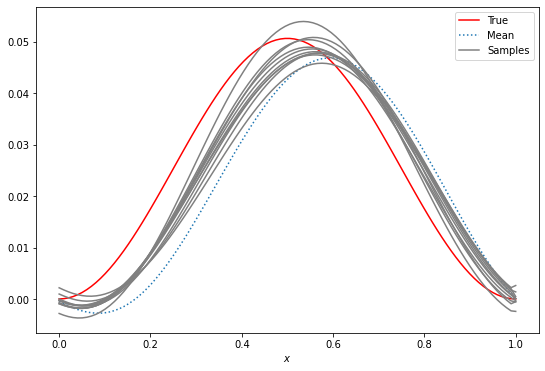

In [3]:
mean2, var2 = poisson.posterior(X, 16, 2)
sample = np.random.multivariate_normal(mean2, var2, size=10)
plt.figure(figsize = (9,6))
plt.plot(np.linspace(0, 1, N), real_u(np.linspace(0, 1, N)), color = 'r')
plt.plot(np.linspace(0, 1, N),  mean1, linestyle = 'dotted')
plt.plot(np.linspace(0, 1, N),  sample.T, color = 'grey')
plt.xlabel(r'$x$')
plt.legend(['True', 'Mean', 'Samples'])
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


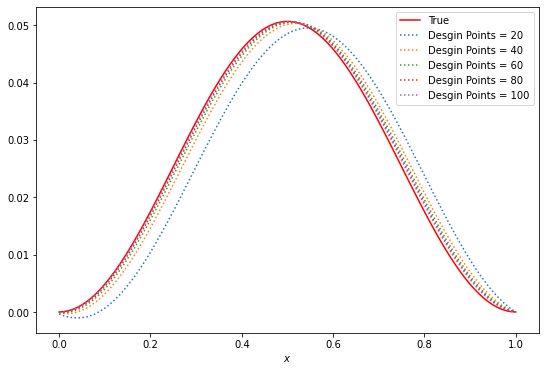

In [4]:
# investigate different choice of design points 


design_points = [20, 40, 60, 80, 100]

N = 100
X = [(1/N)*i for i in range(N)]

plt.figure(figsize = (9,6))
plt.plot(np.linspace(0, 1, N), real_u(np.linspace(0, 1, N)), color = 'r', label='True')

for x in design_points: 
    mean_design, var_design = poisson.posterior(X, x, 2)
    plt.plot(np.linspace(0, 1,  N),  mean_design,  linestyle = 'dotted', label = f'Desgin Points = {x}')

plt.xlabel(r'$x$')
plt.legend()

plt.savefig('mA.eps', format='eps')

In [ ]:
# PMM with Gaussian kernel and different selection of L

L = [0.25+ 0.025*i for i in range(0, 5)]

N = 100
X = [(1/N)*i for i in range(N)]
plt.figure(figsize = (9,6))
plt.plot(np.linspace(0, 1, N), real_u(np.linspace(0, 1, N)), color = 'r', label='True')
for l in L:

    def gauss_kernel(x1, x2, L=l):
        return np.exp(- (x1-x2)**2 / (2* L**2))

    def gauss_kernel_derix(x1, x2, L=l):
        return np.exp(-(x1-x2)**2 / (2* L**2)) * (-(x1 - x2) / L**2)

    def gauss_kernel_deriy(x1, x2, L=l):
        return np.exp(-(x1-x2)**2 / (2* L**2)) * ((x1 - x2) / L**2)

    def gauss_kernel_derixy(x1, x2, L=l):
        return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**4) * (-(x1-x2)**2  + L**2)

    def gauss_kernel_derixx(x1, x2, L=l): #This is A operator 
        return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**4) * ((x1-x2)**2  - L**2)

    def gauss_kernel_deriyy(x1, x2, L=l): #This is A_hat operator 
        return gauss_kernel_derixx(x1, x2, L) 

    new_poisson = PMM.PMM(g1, b1, gauss_kernel_derixx, gauss_kernel, gauss_kernel_deriyy, gauss_kernel, 0, 1, D, gauss_kernel, gauss_kernel_derixxyy, gauss_kernel_derixx, gauss_kernel_deriyy, gauss_kernel)
    new_mean1, new_var1 = new_poisson.posterior(X, 13, 2)
    plt.plot(np.linspace(0, 1, N),  new_mean1, linestyle = 'dotted', label=f'PMM L={l}')

plt.xlabel(r'$x$')
plt.legend(loc = 'upper right')

plt.show()

In [ ]:
### PMM with Matern kernel 
def matern_kernel(x1, x2, sigma=0.1, l = 0.25):
    r = x1 - x2
    return (sigma**2) * (1 + np.sqrt(3)*r/l) * np.exp(-np.sqrt(3)*r/l)

def matern_kernel_derix(x1, x2, sigma=0.1, l = 0.25):
    r = x1 - x2
    return - (3* (sigma**2) * r* np.exp(-np.sqrt(3)*r/l)) / (l**2)

def matern_kernel_deriy(x1, x2, sigma=0.1, l=0.25):
    r = x1 - x2
    return (3* (sigma**2) * r* np.exp(-np.sqrt(3)*r/l)) / (l**2)

def matern_kernel_derixx(x1, x2, sigma=0.1, l=0.25):
    r = x1 - x2
    return - (3* (sigma**2) * np.exp(-np.sqrt(3)*r/l) * (l - np.sqrt(3)*r)) / (l**3) 

def matern_kernel_deriyy(x1, x2, sigma=0.1, l=0.25):
    r = x1 - x2 
    return - (3* (sigma**2) * np.exp(-np.sqrt(3)*r/l) * (l - np.sqrt(3)*r)) / (l**3) 

def matern_kernel_derixxyy(x1, x2, sigma=0.1, l=0.25):
    r = x1 - x2
    return -(9 * (sigma*2) * np.exp(-np.sqrt(3)*r/l) * (3*l - np.sqrt(3)*r)) / (l**5)

In [ ]:
poisson_metern = PMM.PMM(g1, b1, matern_kernel_derixx, matern_kernel, matern_kernel_deriyy, matern_kernel, 0, 1, D, matern_kernel, matern_kernel_derixxyy, matern_kernel_derixx, matern_kernel_deriyy, matern_kernel)

N = 100 
X = [(1/N)*i for i in range(N)]
mean_metern, var_metern = poisson_metern.posterior(X, 30, 2)

# compare the mean of multivariate normal with true solution 
plt.plot(np.linspace(0, 1, N),  mean_metern, linestyle = 'dotted')
plt.plot(np.linspace(0, 1, N), real_u(np.linspace(0, 1, 100)), color = 'r')
plt.xlabel(r'$x$')
plt.legend(['Mean','True'])
plt.show()

# Don't know why this is not working, need to look into this 

Baysian Inverse Problem 

In [ ]:
def real_u(x):
    return  (1/ (4* np.pi**2))*((np.sin(np.pi * x))**2)

def gauss_kernel(x1, x2, L=0.25):
    return np.exp(- (x1-x2)**2 / (2* L**2))

def gauss_kernel_derix(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (-(x1 - x2) / L**2)

def gauss_kernel_deriy(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * ((x1 - x2) / L**2)

def gauss_kernel_derixy(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**4) * (-(x1-x2)**2  + L**2)

def gauss_kernel_derixx(x1, x2, L=0.25): #This is A operator 
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**4) * ((x1-x2)**2  - L**2)

def gauss_kernel_deriyy(x1, x2, L=0.25): #This is A_hat operator 
    return gauss_kernel_derixx(x1, x2, L) 

sample_x = np.linspace(0, 1, 20)
sample_y = real_u(sample_x) + np.random.normal(0, 0.01**2, 20)

theta = np.linspace(1, 3, 40)

N = 20
X = [(1/N)*i for i in range(N)]
prob1 = []

for i in range(40):
    g2 =  lambda x: np.cos(2*np.pi*x) / theta[i] 
    poisson_tmp = PMM.PMM(g2, b1, gauss_kernel_derixx, gauss_kernel, gauss_kernel_deriyy, gauss_kernel, 0, 1, D, gauss_kernel, gauss_kernel_derixxyy, gauss_kernel_derixx, gauss_kernel_deriyy, gauss_kernel)

    mean, var = poisson_tmp.posterior(X, 15, 2)
    new_var = var + (0.01**2)*np.identity(20)
    distribution = multivariate_normal(mean, new_var)
    prob1.append(distribution.pdf([sample_y]))

prob2 = []

for i in range(40):
    g2 =  lambda x: np.cos(2*np.pi*x) / theta[i] 
    poisson_tmp = PMM.PMM(g2, b1, gauss_kernel_derixx, gauss_kernel, gauss_kernel_deriyy, gauss_kernel, 0, 1, D, gauss_kernel, gauss_kernel_derixxyy, gauss_kernel_derixx, gauss_kernel_deriyy, gauss_kernel)

    mean, var = poisson_tmp.posterior(X, 12, 2)
    new_var = var + (0.01**2)*np.identity(20)
    distribution = multivariate_normal(mean, new_var)
    prob2.append(distribution.pdf([sample_y]))

prob3 = []

for i in range(40):
    g2 =  lambda x: np.cos(2*np.pi*x) / theta[i] 
    poisson_tmp = PMM.PMM(g2, b1, gauss_kernel_derixx, gauss_kernel, gauss_kernel_deriyy, gauss_kernel, 0, 1, D, gauss_kernel, gauss_kernel_derixxyy, gauss_kernel_derixx, gauss_kernel_deriyy, gauss_kernel)

    mean, var = poisson_tmp.posterior(X, 10, 2)
    new_var = var + (0.01**2)*np.identity(20)
    distribution = multivariate_normal(mean, new_var)
    prob3.append(distribution.pdf([sample_y]))

plt.figure(figsize = (15,10))
plt.plot(theta, [x/ (10**31) for x in prob3], label = f'mA = 10')
plt.plot(theta, [x/ (10**31) for x in prob2], label = f'mA = 12')
plt.plot(theta, [x/ (10**31) for x in prob1], label = f'mA = 15')
plt.axvline(x=2, linestyle = 'dotted')
plt.xlabel(r'$\theta$')
plt.legend()
plt.savefig('Inverse_Problem.eps', format='eps')

In [ ]:
N = 20
X = [(1/N)*i for i in range(N)]
prob = []

for i in range(40):
    g2 =  lambda x: np.cos(2*np.pi*x) / theta[i] 
    poisson_tmp = PMM.PMM(g2, b1, gauss_kernel_derixx, gauss_kernel, gauss_kernel_deriyy, gauss_kernel, 0, 1, D, gauss_kernel, gauss_kernel_derixxyy, gauss_kernel_derixx, gauss_kernel_deriyy, gauss_kernel)

    mean, var = poisson_tmp.posterior(X, 15, 2)
    new_var = var + (0.01**2)*np.identity(20)
    distribution = multivariate_normal(mean, new_var)
    prob.append(distribution.pdf([sample_y]))

plt.plot(theta, [x/ (10**31) for x in prob])
plt.axvline(x=2, linestyle = 'dotted')
plt.show()